In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

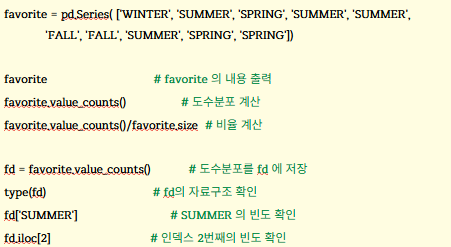

In [2]:
favorite = pd.Series( ['WINTER', 'SUMMER', 'SPRING', 'SUMMER', 'SUMMER',
            'FALL', 'FALL', 'SUMMER', 'SPRING', 'SPRING'])

print(favorite)                               # favorite 의 내용 출력
print('-'*50)
print(favorite.value_counts())                # 도수분포 계산
print('-'*50)
print(favorite.value_counts()/favorite.size)  # 비율 계산
print('-'*50)
fd = favorite.value_counts()           # 도수분포를 fd 에 저장
print(type(fd))                               # fd의 자료구조 확인
print(fd['SUMMER'])                           # SUMMER 의 빈도 확인  
print(fd.iloc[2])                             # 인덱스 2번째의 빈도 확인

0    WINTER
1    SUMMER
2    SPRING
3    SUMMER
4    SUMMER
5      FALL
6      FALL
7    SUMMER
8    SPRING
9    SPRING
dtype: object
--------------------------------------------------
SUMMER    4
SPRING    3
FALL      2
WINTER    1
Name: count, dtype: int64
--------------------------------------------------
SUMMER    0.4
SPRING    0.3
FALL      0.2
WINTER    0.1
Name: count, dtype: float64
--------------------------------------------------
<class 'pandas.core.series.Series'>
4
2


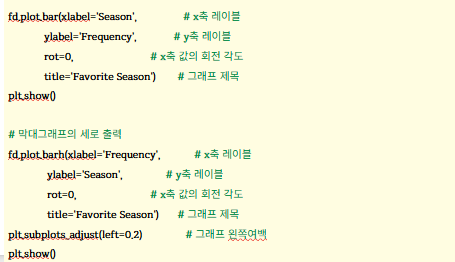

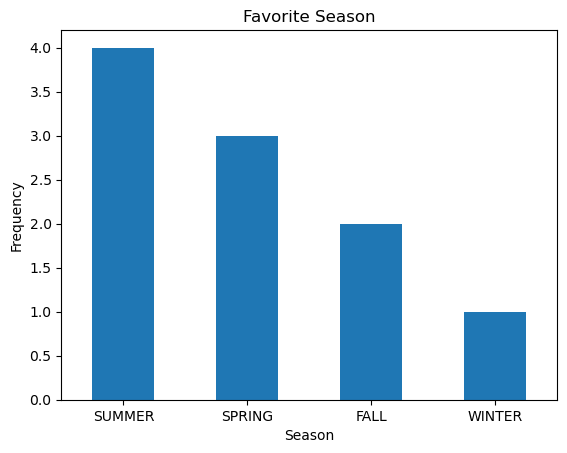

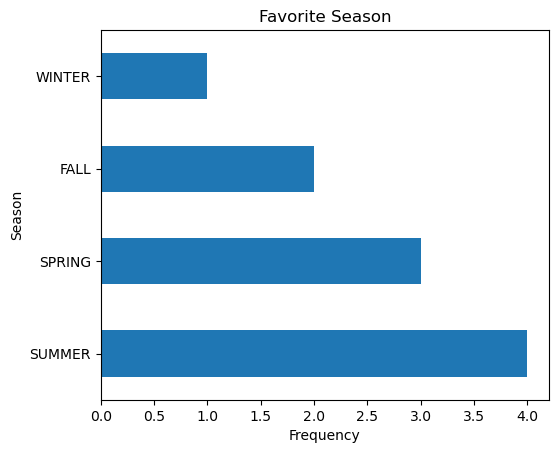

In [3]:
fd.plot.bar(xlabel='Season',               # x축 레이블
            ylabel='Frequency',            # y축 레이블
            rot=0,                         # x축 값의 회전 각도
            title='Favorite Season')       # 그래프 제목 
plt.show()

# 막대그래프의 세로 출력

fd.plot.barh(xlabel='Frequency',           # x축 레이블
             ylabel='Season',              # y축 레이블
             rot=0,                        # x축 값의 회전 각도
             title='Favorite Season')      # 그래프 제목 
plt.subplots_adjust(left=0.2)              # 그래프 왼쪽여백
plt.show()

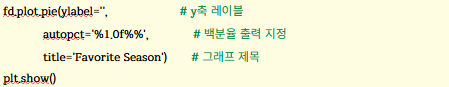

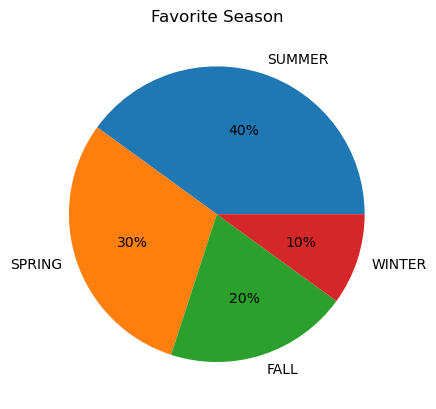

In [4]:
fd.plot.pie(ylabel='',                     # y축 레이블
            autopct='%1.0f%%',             # 백분율 출력 지정          
            title='Favorite Season')       # 그래프 제목
plt.show()

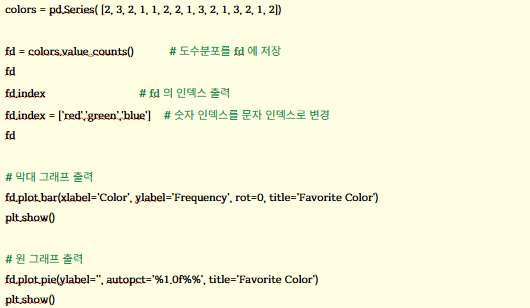

2    7
1    5
3    3
Name: count, dtype: int64
--------------------------------------------------
red      7
green    5
blue     3
Name: count, dtype: int64
--------------------------------------------------


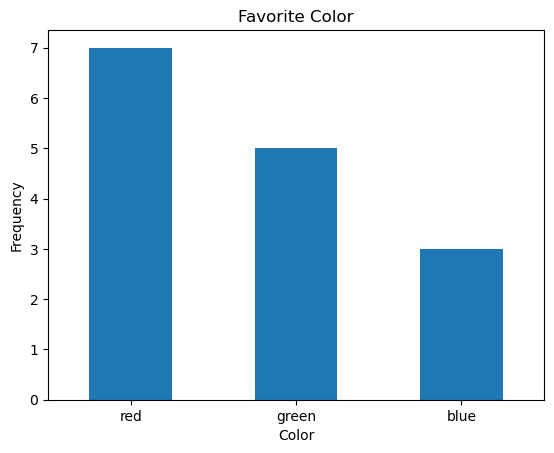

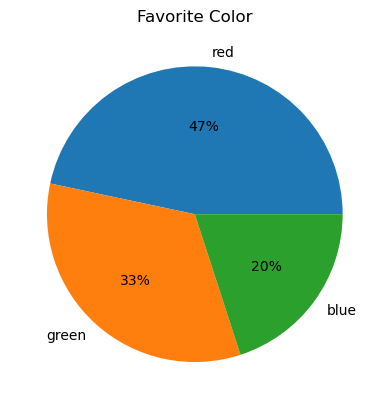

In [5]:
colors = pd.Series( [2, 3, 2, 1, 1, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2])
fd = colors.value_counts()           # 도수분포를 fd 에 저장
print(fd)
print('-'*50)

fd.index                             # fd 의 인덱스 출력  
fd.index = ['red','green','blue']    # 숫자 인덱스를 문자 인덱스로 변경
print(fd)
print('-'*50)

# 막대 그래프 출력
fd.plot.bar(xlabel='Color', ylabel='Frequency', rot=0, title='Favorite Color')
plt.show()

# 원 그래프 출력
fd.plot.pie(ylabel='', autopct='%1.0f%%', title='Favorite Color')
plt.show()

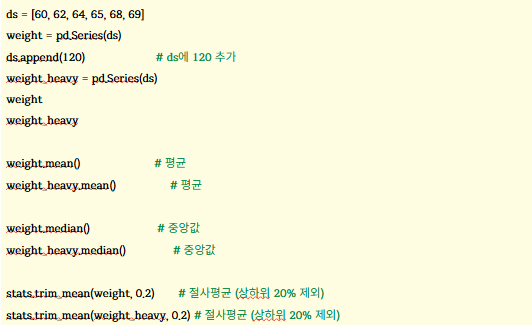

In [6]:
ds = [60, 62, 64, 65, 68, 69]
weight = pd.Series(ds)
ds.append(120)                     # ds에 120 추가
weight_heavy = pd.Series(ds)
print(weight)
print('-'*50)
print(weight_heavy)
print('-'*50)
print(weight.mean())                      # 평균
print(weight_heavy.mean())                # 평균
print('-'*50)
print(weight.median())                    # 중앙값
print(weight_heavy.median())              # 중앙값
print('-'*50)
print(stats.trim_mean(weight, 0.2))       # 절사평균 (상하위 20% 제외)
print(stats.trim_mean(weight_heavy, 0.2)) # 절사평균 (상하위 20% 제외)

0    60
1    62
2    64
3    65
4    68
5    69
dtype: int64
--------------------------------------------------
0     60
1     62
2     64
3     65
4     68
5     69
6    120
dtype: int64
--------------------------------------------------
64.66666666666667
72.57142857142857
--------------------------------------------------
64.5
65.0
--------------------------------------------------
64.75
65.6


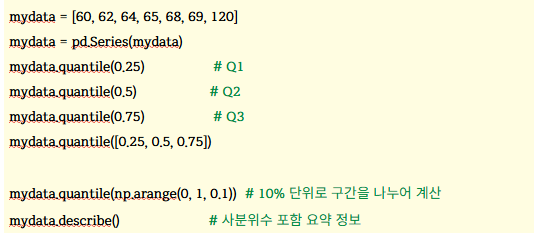

In [7]:
mydata = [60, 62, 64, 65, 68, 69, 120]
mydata = pd.Series(mydata)
print(mydata.quantile(0.25))                 # Q1
print(mydata.quantile(0.5))                  # Q2
print(mydata.quantile(0.75))                 # Q3 
print('-'*50)
print(mydata.quantile([0.25, 0.5, 0.75]))
print('-'*50)
print(mydata.quantile(np.arange(0, 1, 0.1)))  # 10% 단위로 구간을 나누어 계산
print('-'*50)
print(mydata.describe())                      # 사분위수 포함 요약 정보

63.0
65.0
68.5
--------------------------------------------------
0.25    63.0
0.50    65.0
0.75    68.5
dtype: float64
--------------------------------------------------
0.0    60.0
0.1    61.2
0.2    62.4
0.3    63.6
0.4    64.4
0.5    65.0
0.6    66.8
0.7    68.2
0.8    68.8
0.9    89.4
dtype: float64
--------------------------------------------------
count      7.000000
mean      72.571429
std       21.149130
min       60.000000
25%       63.000000
50%       65.000000
75%       68.500000
max      120.000000
dtype: float64


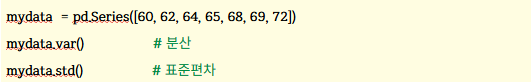

In [8]:
print(mydata.var())                 # 분산 
print(mydata.std())                 # 표준편차 

447.2857142857143
21.149130343484913


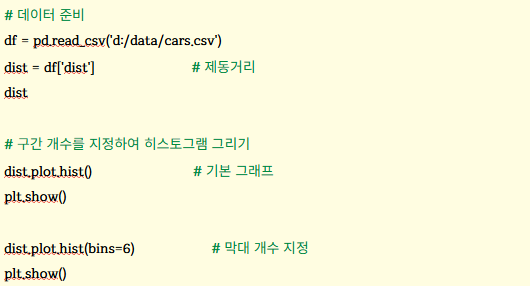

0       2
1      10
2       4
3      22
4      16
5      10
6      18
7      26
8      34
9      17
10     28
11     14
12     20
13     24
14     28
15     26
16     34
17     34
18     46
19     26
20     36
21     60
22     80
23     20
24     26
25     54
26     32
27     40
28     32
29     40
30     50
31     42
32     56
33     76
34     84
35     36
36     46
37     68
38     32
39     48
40     52
41     56
42     64
43     66
44     54
45     70
46     92
47     93
48    120
49     85
Name: dist, dtype: int64


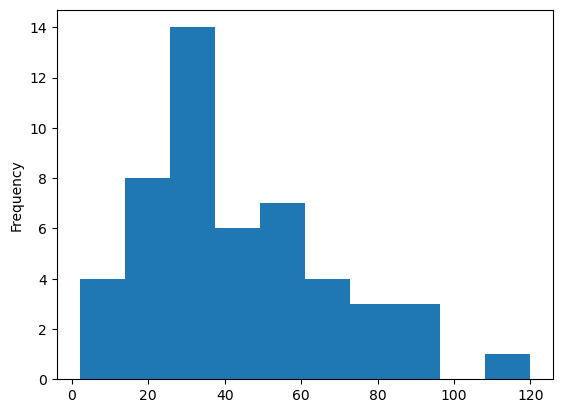

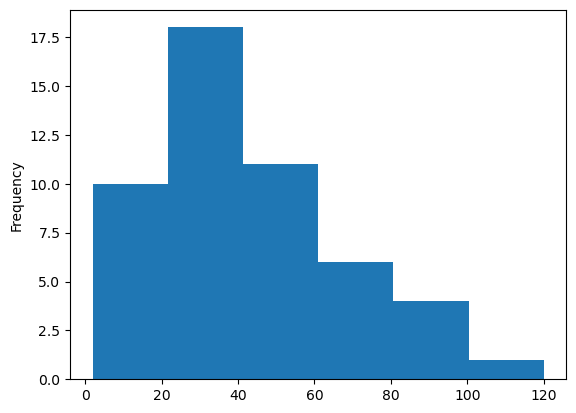

In [9]:
df = pd.read_csv('../data/cars.csv')
dist = df['dist']                        # 제동거리
print(dist)

# 구간 개수를 지정하여 히스토그램 그리기
dist.plot.hist()                         # 기본 그래프  
plt.show()
dist.plot.hist(bins=6)                   # 막대 개수 지정
plt.show()

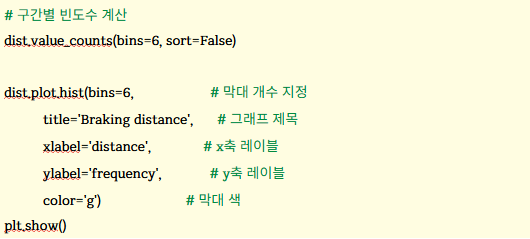

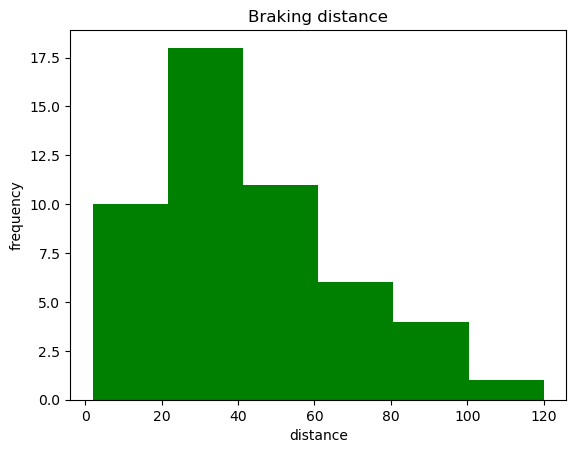

In [10]:
dist.value_counts(bins=6, sort=False)
dist.plot.hist(bins=6,                   # 막대 개수 지정    
          title='Braking distance',      # 그래프 제목 
          xlabel='distance',             # x축 레이블
          ylabel='frequency',            # y축 레이블
          color='g')                     # 막대 색
plt.show()

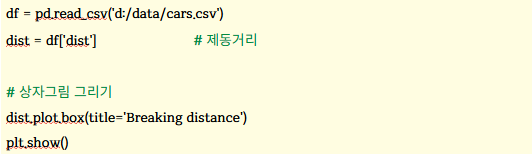

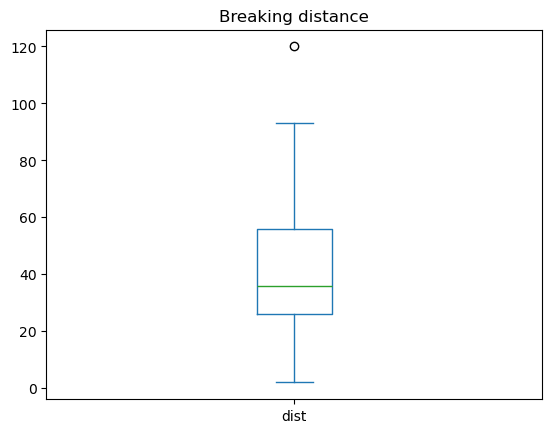

In [11]:
# 상자그림 그리기
dist.plot.box(title='Breaking distance')
plt.show()

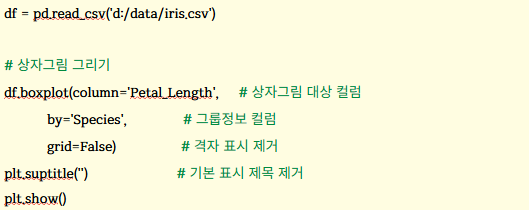

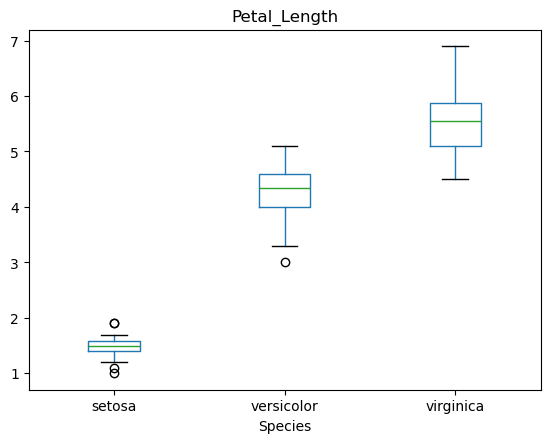

In [12]:
df = pd.read_csv('../data/iris.csv')
df.boxplot(column='Petal_Length', by='Species', grid=False)
plt.suptitle('')
plt.show()

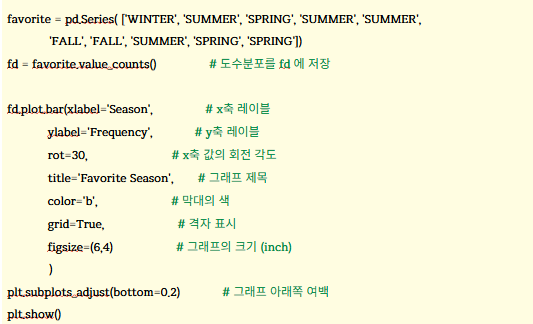

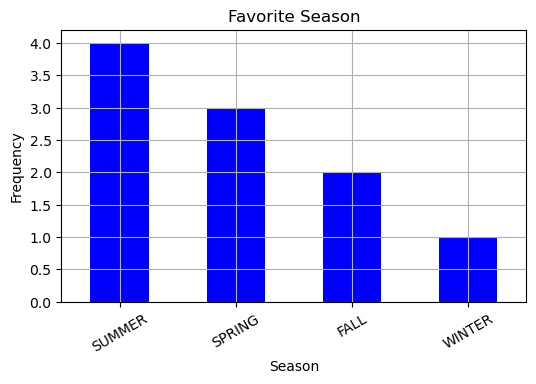

In [13]:
favorite = pd.Series( ['WINTER', 'SUMMER', 'SPRING', 'SUMMER', 'SUMMER', 'FALL', 'FALL', 'SUMMER', 'SPRING', 'SPRING'])
fd = favorite.value_counts() # 도수분포를 fd 에 저장
fd.plot.bar(xlabel='Season',
    ylabel='Frequency',
    rot=30,
    title='Favorite Season',
    color='b',
    grid=True, 
    figsize=(6,4))
plt.subplots_adjust(bottom=0.2)
plt.show()

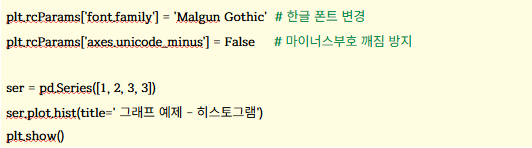

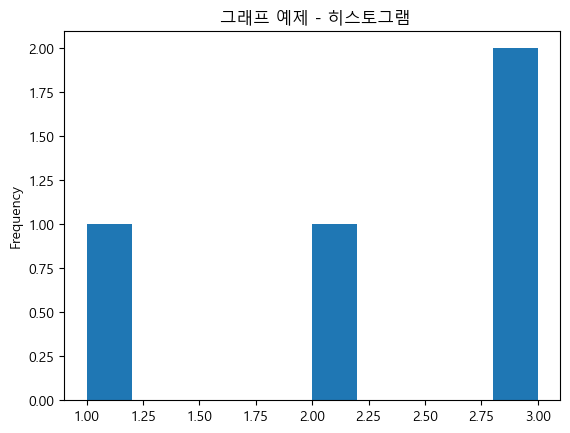

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 변경
plt.rcParams['axes.unicode_minus'] = False     # 마이너스부호 깨짐 방지

ser = pd.Series([1, 2, 3, 3])
ser.plot.hist(title=' 그래프 예제 - 히스토그램')
plt.show()

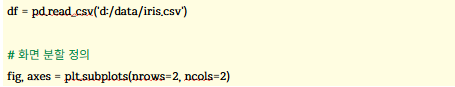
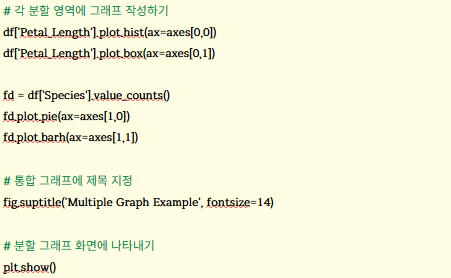

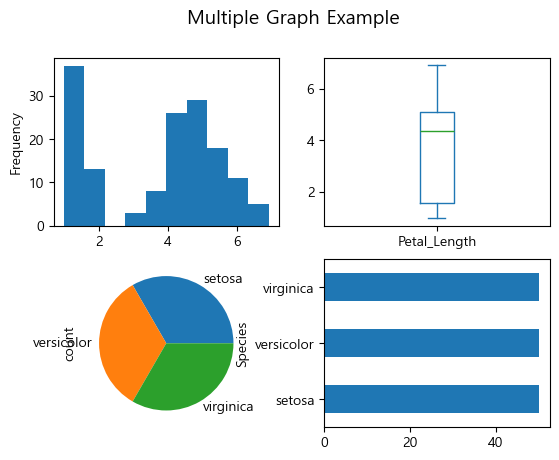

In [15]:
# 화면 분할 정의
fig, axes = plt.subplots(nrows=2, ncols=2)

# 각 분할 영역에 그래프 작성하기
df['Petal_Length'].plot.hist(ax=axes[0,0])
df['Petal_Length'].plot.box(ax=axes[0,1])
fd = df['Species'].value_counts()
fd.plot.pie(ax=axes[1,0])
fd.plot.barh(ax=axes[1,1])

# 통합 그래프에 제목 지정
fig.suptitle('Multiple Graph Example', fontsize=14)

# 분할 그래프 화면에 나타내기 
plt.show()